# 📝 Problem Statement

## 🎯 Objective

Develop a machine learning model that can **predict the brand of a car** based on its characteristics (features such as engine size, fuel type, price, horsepower, etc.).

The model should assist dealerships, resellers, or recommendation systems in **automatically classifying vehicles** into one of several known car brands.

---

## 📥 Input

A dataset containing car attributes. Each record includes features such as:

- Engine size
- Horsepower
- Mileage
- Fuel type
- Transmission type
- Price
- Weight
- Year
- ... and other technical specifications

Each record is labeled with a **target class** representing the car's **brand**, encoded as:

- `0` → Brand A  
- `1` → Brand B  
- `2` → Brand C  

---

## 📤 Output

A trained classification model that, given a new car's features, outputs the **predicted car brand**.

---

## 🧪 Constraints

- The dataset may be **imbalanced** (some brands occur more frequently).
- **High variance** risk with Decision Trees, which may lead to **overfitting**.
- The solution should generalize well to **unseen test data**.

---

## 🧠 Success Criteria

- Achieve **high classification accuracy** across all brands, with particular attention to **minority classes**.
- Maintain a good balance between **precision, recall, and F1-score** for each class.
- Avoid overfitting by employing **regularization or ensemble methods** if necessary.



In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Build a Predictive Model

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/car_brand_prediction.csv')
df.sample(10)
df['brand'].value_counts()

,count
brand,
US.,162
Japan.,51
Europe.,48


## Preprocessing the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


In [ ]:
# No Null Record in the Dataset
df.isnull().sum()
## So, no action

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


In [ ]:
# No Outliers in the Dataset
## So, no action

In [ ]:
# ENCODING
## brand is categorical value. We must convert it into numerical equivalent.
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['brand'] = le.fit_transform(df_encoded['brand'])
df_encoded.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2


In [ ]:
# SCALING
## mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year are numerical values
sc = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']] = sc.fit_transform(df_scaled[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']])
df_scaled.sample(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,-0.786934,1.393053,0.956969,0.584822,0.978221,-0.188601,0.875880,2
6,-1.299192,1.393053,1.380368,1.277509,1.590284,-0.877058,-0.776684,2
26,1.005968,-0.919105,-1.196845,-1.023201,-1.440773,1.188315,-1.327539,1
142,1.134033,-0.919105,-0.524929,-0.256298,-0.396873,-0.532829,1.702163,1
5,-0.018547,1.393053,1.371163,0.461128,1.048438,0.499857,0.875880,2


In [ ]:
# SEGREGRATE INDEPENDENT AND DEPENDENT VARIABLES
X = df_encoded.drop('brand', axis=1)
y = df_encoded['brand']

In [ ]:
# SPLIT TRAIN AND TEST DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Shape: ", X_train.shape[0] * 100 / df_scaled.shape[0])
print("Test Shape", X_test.shape[0] * 100 / df_scaled.shape[0])

Train Shape:  79.69348659003832
Test Shape 20.306513409961685


## Training Model

In [ ]:
# TRAIN the MODEL
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

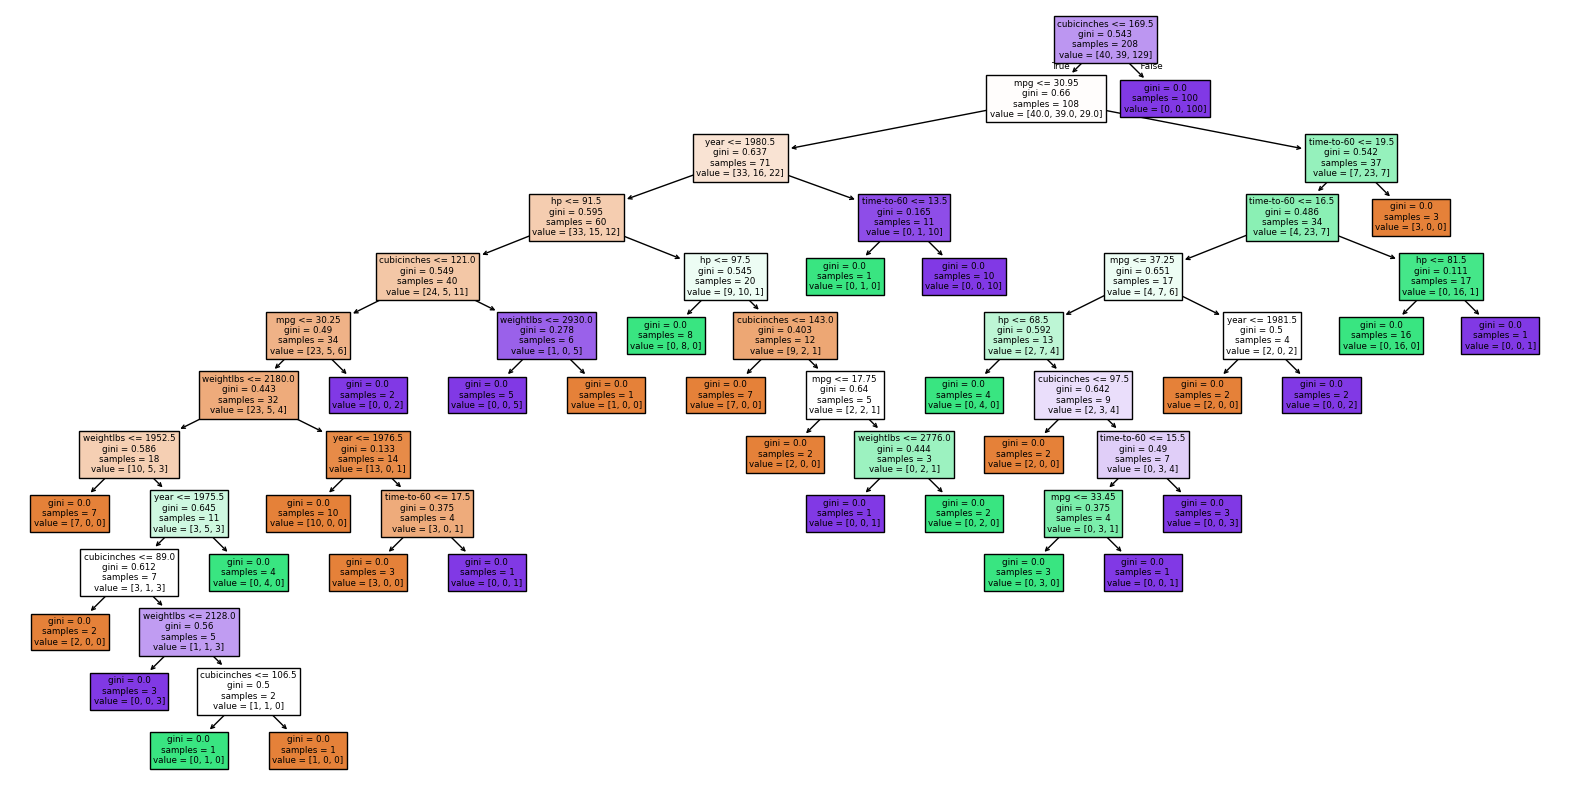

In [ ]:
# PLOT the MODEL DECISSION TREE
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.savefig('tree.png', dpi=300)
plt.show()

In [ ]:
# PREDICT on KNOWN/TRAIN DATA
y_pred_train = model.predict(X_train)

# PREDICT on TEST DATA
y_pred_test = model.predict(X_test)

In [ ]:
# EVALUATE MODEL using CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

print("Accuracy on Train Data: ", accuracy_score(y_train, y_pred_train))
print("Error Rate on Train Data: ", 1 - accuracy_score(y_train, y_pred_train))

print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred_test))
print("Error Rate on Test Data: ", 1 - accuracy_score(y_test, y_pred_test))


[[ 6  1  1]
 [ 3  9  0]
 [ 0  2 31]]
Accuracy on Train Data:  1.0
Error Rate on Train Data:  0.0
Accuracy on Test Data:  0.8679245283018868
Error Rate on Test Data:  0.13207547169811318


In [ ]:
# CLASSIFICATION REPORT ON TRAIN DATA
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       129

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



In [ ]:
# CLASSIFICATION REPORT ON TEST DATA
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.75      0.75      0.75        12
           2       0.97      0.94      0.95        33

    accuracy                           0.87        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.87      0.87      0.87        53



# 🚗 Model Prediction Evaluation Summary

## 🧠 Model Used
- **Model Type**: Decision Tree Classifier
- **Objective**: Classify car brands (encoded as 0, 1, 2)

---

## 📊 Dataset Info

- **Training Samples**: 208
- **Test Samples**: 53
- **Target Classes**:
  - `0`: Brand A
  - `1`: Brand B
  - `2`: Brand C (most frequent)

---

## 📈 Training Performance

| Metric      | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Class 0     | 1.00      | 1.00   | 1.00     | 40      |
| Class 1     | 1.00      | 1.00   | 1.00     | 39      |
| Class 2     | 1.00      | 1.00   | 1.00     | 129     |
| **Accuracy**| **1.00**  |        |          | 208     |

✅ The model **perfectly classifies** the training data.

---

## 📉 Test Performance

| Metric      | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Class 0     | 0.67      | 0.75   | 0.71     | 8       |
| Class 1     | 0.75      | 0.75   | 0.75     | 12      |
| Class 2     | 0.97      | 0.94   | 0.95     | 33      |
| **Accuracy**| **0.87**  |        |          | 53      |

---

## 🧾 Summary

- 🎯 **Training accuracy is 100%**, indicating the model **overfits** the training data.
- 🧪 **Test accuracy is 87%**, which is good but significantly lower than training accuracy.
- 📉 **Classes 0 and 1** (minority classes) have lower precision and recall compared to class 2.
- 🔍 **Class 2 dominates the dataset**, which may cause the model to bias predictions toward this class.

---

## 🚨 Observations & Recommendations

- The model is **overfitting**:
  - Decision Trees can easily memorize the training data if not pruned or regularized.
- Consider:
  - Adjusting the **Hyper-Parameters** like Limiting tree depth (`max_depth`), or 'criterion'.
  - Using ensemble methods like **Random Forest** or **Gradient Boosting**
  - Handling class imbalance with:
    - **Class weights**
    - **Oversampling/Undersampling**

---

## ✅ Conclusion

- The model performs well on the test set (87% accuracy), especially for the dominant class.
- However, overfitting and class imbalance need to be addressed to improve generalization and fairness across classes.


# 🎛️ HYPER-PARAMETER TUNNING in MACHINE LEARNING

## 🔍 What is it?

**Hyperparameter tuning** is the process of finding the best set of hyperparameters (i.e., configuration settings defined *before* training) that result in the best performance of a machine learning model.

---

## 🧠 What are Hyperparameters?

Hyperparameters are not learned from the training data. Instead, they control how the model is trained or structured.

### 🔧 Common Examples:
- `learning_rate` – How fast the model learns
- `max_depth` – Maximum depth of a decision tree
- `n_estimators` – Number of trees in an ensemble
- `batch_size` – Number of samples per gradient update
- `dropout_rate` – Regularization technique in neural networks
- `C` and `gamma` – Parameters in SVMs

---

## 🛠️ What is Tuning?

Tuning means searching through a defined hyperparameter space to find the best combination that gives the best model performance (e.g., highest accuracy or lowest loss).

---

## ⚙️ Common Hyperparameter Tuning Techniques

| Method              | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **Grid Search**     | Exhaustively tries all combinations of specified values                     |
| **Random Search**   | Randomly samples combinations of hyperparameter values                      |
| **Bayesian Opt.**   | Uses previous trials to model performance and guide the next trials         |
| **Hyperband**       | Combines random search with early stopping to save computation              |
| **Genetic Algorithms** | Uses evolution-inspired methods to evolve good hyperparameter combinations |

---

## 🧪 Example: Grid Search with SVM

```python
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [ ]:
# ADJUST THE HYPER-PARAMETER and SEE THE IMPACT IN CLASSIFICATION REPORT
## TUNNING1 (PRUNNING): Change the hyper-parameters in the model training.
## Prunning -> set the max_depth to reduce the tree branching. By-default the depth is infinite. Lower branches are of less significance.
model_tunned1 = DecisionTreeClassifier(max_depth=3)
# model_tunned1 = DecisionTreeClassifier(max_depth=4, criterion='entropy') #criterion could be entropy or gini. gini is default
model_tunned1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

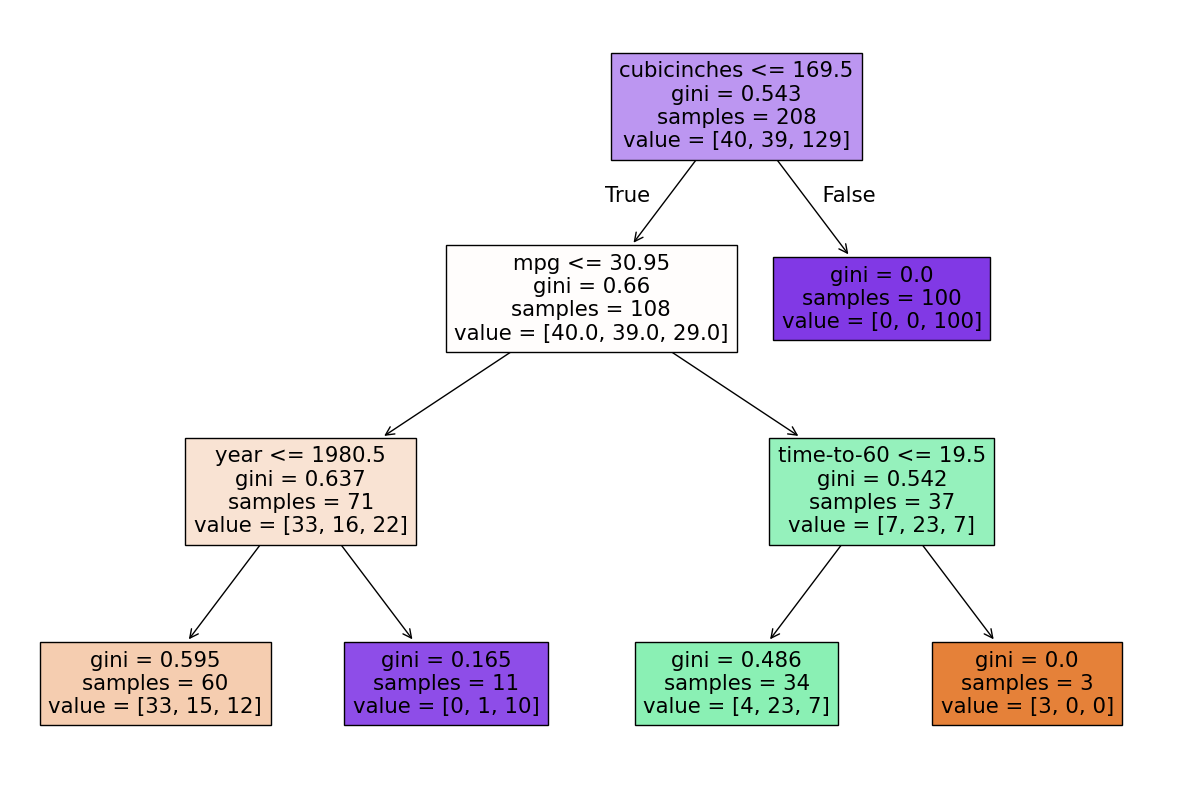

In [ ]:
# Plot the Decission Tree made by the algorithm
plt.figure(figsize=(15, 10))
plot_tree(model_tunned1, filled=True, feature_names=X.columns)
plt.savefig('tree_pruned.png', dpi=300)
plt.show()

In [ ]:
# Predict on known data
y_pred_train2 = model_tunned1.predict(X_train)

# Predict on test-data
y_pred_test2 = model_tunned1.predict(X_test)

In [ ]:
# Classification Report on Train Data
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70        40
           1       0.68      0.59      0.63        39
           2       0.99      0.85      0.92       129

    accuracy                           0.81       208
   macro avg       0.75      0.78      0.75       208
weighted avg       0.85      0.81      0.82       208



In [ ]:
# Classification Report on Test Data
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.70      0.58      0.64        12
           2       0.96      0.79      0.87        33

    accuracy                           0.75        53
   macro avg       0.70      0.75      0.70        53
weighted avg       0.82      0.75      0.77        53



## ✅ Observation

- 🎯 **Overfitting reduced** compared to previous model (train acc was 1.0).
- ✅ **Better generalization** across test data.
- ⚠️ **Class 0** has high recall but low precision → model overpredicts it.
- 📌 Class 2 (majority class) still dominates performance.

In [ ]:
# FEATURE IMPORTANCES
## which features are given importance by the model, and which are not.
# print (model.feature_importances_)
# feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': model_tunned1.feature_importances_})
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_imp_df.sort_values('Importance', ascending=False)

# You can remove the less signifanct features from input data and then train the model

[0.11694858 0.         0.45826995 0.11251886 0.08885223 0.10938657
 0.1140238 ]


,Feature,Importance
2,cubicinches,0.458270
0,mpg,0.116949
6,year,0.114024
3,hp,0.112519
5,time-to-60,0.109387
4,weightlbs,0.088852
1,cylinders,0.000000


# HYPER-PARAMETER TUNNING TECHNIQUE - GridSearch - Cross Validation (GridSearchCV)

**Grid Search** is a hyperparameter tuning technique where **every combination** of a defined set of hyperparameter values is tried. The model is trained and evaluated for **each combination**, and the one with the **best performance** is selected.

---

## ⚙️ How Grid Search Works

1. Define a **set of values** for each hyperparameter.
2. Create a **grid** of all possible combinations.
3. **Train** and **evaluate** the model on each combination using **cross-validation**.
4. Choose the combination that gives the **best result** on the validation set.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [ ]:
# Hyper-Parameters Choosen Here are:
## criterion, max_depth, min_samples_leaf

## Grid of parameters
## https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 10), #[None, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(2, 10) #[5, 10, 15] #np.arange(2, 10)
}
print(param_grid)

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(model, param_grid, cv=5) # (model, grid, cross_validation)
gridcv.fit(X_train, y_train)

{'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
# Find the best estimator
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(6), min_samples_leaf=np.int64(5))

In [ ]:
# Train Model
## Use the best estimator parameters to train the model
model_tunned2 = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5)
model_tunned2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [ ]:
# Predict on known data
y_pred_train2 = model_tunned1.predict(X_train)

# Predict on test-data
y_pred_test2 = model_tunned1.predict(X_test)

In [ ]:
# Classification Report on Train Data
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70        40
           1       0.68      0.59      0.63        39
           2       0.99      0.85      0.92       129

    accuracy                           0.81       208
   macro avg       0.75      0.78      0.75       208
weighted avg       0.85      0.81      0.82       208



In [ ]:
# Classification Report on Test Data
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.70      0.58      0.64        12
           2       0.96      0.79      0.87        33

    accuracy                           0.75        53
   macro avg       0.70      0.75      0.70        53
weighted avg       0.82      0.75      0.77        53

